<a href="https://colab.research.google.com/github/Janina712/MLTSA22_JBoecher/blob/main/HW5/JB_Class_3_8_Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='red'> FBB very well done</font>

In [ ]:
#installs
!pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 10.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
# imports
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import cluster 
import numpy as np
from sklearn.cluster import KMeans

Imports are placed below the installation because otherwise pandas needs to be imported again.

In [ ]:
cd drive/MyDrive/MLTSA22

/content/drive/MyDrive/MLTSA22


Access data as excel sheet from the web:

In [ ]:
!wget http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel

--2022-03-15 01:12:42--  http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel
Resolving api.worldbank.org (api.worldbank.org)... 52.188.136.184
Connecting to api.worldbank.org (api.worldbank.org)|52.188.136.184|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195584 (191K) [application/vnd.ms-excel]
Saving to: ‘SP.POP.TOTL?downloadformat=excel’

SP.POP.TOTL?downloa 100%[===================>] 191.00K   997KB/s    in 0.2s    

2022-03-15 01:12:43 (997 KB/s) - ‘SP.POP.TOTL?downloadformat=excel’ saved [195584/195584]



Data clean-up: empty rows on top of dataframe are removed and index is set to country name.

In [ ]:
pop_df = pd.read_excel("SP.POP.TOTL?downloadformat=excel", skiprows = 3, header=0, usecols = [0] + list(range(4,100))).set_index("Country Name")

/usr/local/lib/python3.7/dist-packages/pandas/io/excel/_base.py:1292: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  **kwds,


In [ ]:
pop_df.shape

(266, 61)

Get number of NANs by summing True booleans:

In [ ]:
# get number of NANs by summing True booleans

pop_df.isna().sum()

1960    2
1961    2
1962    2
1963    2
1964    2
       ..
2016    2
2017    2
2018    2
2019    2
2020    2
Length: 61, dtype: int64

Drop column if contains only NANs

In [ ]:
# drop column if contains only NANs
pop_df_clean = pop_df.dropna(axis = 1, how = "all").dropna(axis = 0, how = "any")

In [ ]:
# check for remaining NANs
pop_df_clean.isna().sum()

1960    0
1961    0
1962    0
1963    0
1964    0
       ..
2016    0
2017    0
2018    0
2019    0
2020    0
Length: 61, dtype: int64

In [ ]:
pop_df_clean.shape

(262, 61)

Clean dataframe (pop_df_clean) contains data from 262 countries over 61 years (1960 - 2020). 

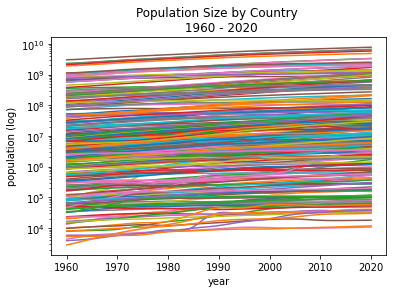

In [ ]:
# visualize clean dataframe
pop_df_clean.T.plot(legend = False, logy = True)
plt.xlabel("year")
plt.ylabel("population (log)");
plt.title("Population Size by Country \n 1960 - 2020");

**Fig. 1.** Log of population size over 61 years (1960 - 2020). Individual countries are represented by single colorful #<font color='red'> _colored_ not colorful (each is a single color)</font> line. 262 countries are shown.

Standardize data to obtain pattern of population growth (no longer absolute population size).

Standardization is achieved using the sklearn preprocessing function. It involves subtracting the population mean from each datapoint and dividing it by the standard deviation.

In [ ]:
# standardize data to obtain pattern of population growth (removed from absolute population size)
pop_df_std = preprocessing.scale(pop_df_clean, axis = 1)
pop_df_std

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


array([[-1.16683255, -1.10342353, -1.06204733, ...,  1.50389765,
         1.52789585,  1.55148028],
       [-1.29416451, -1.27323674, -1.25147869, ...,  1.93191198,
         2.03869861,  2.14700229],
       [-1.08365543, -1.06439588, -1.04406444, ...,  2.06318006,
         2.16033116,  2.25935293],
       ...,
       [-1.54561724, -1.51261636, -1.47833313, ...,  1.61638842,
         1.67589043,  1.73420169],
       [-1.30826109, -1.28680587, -1.26471651, ...,  1.9669992 ,
         2.08380917,  2.2037387 ],
       [-1.69251013, -1.65449631, -1.61476125, ...,  1.46510587,
         1.52630902,  1.59070854]])

In [ ]:
years_for_cluster_plotting = list(range(1960,2021,10))
print(years_for_cluster_plotting)

[1960, 1970, 1980, 1990, 2000, 2010, 2020]


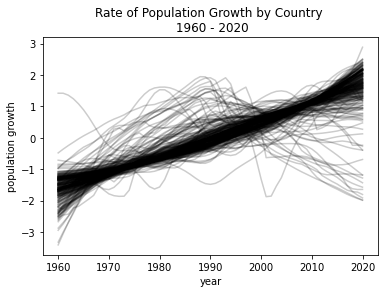

In [ ]:
pl.plot(pop_df_std.T, "k", alpha = 0.2);
plt.xlabel("year")
plt.xticks(np.arange(0,70,10), years_for_cluster_plotting)
plt.ylabel("population growth");
plt.title("Rate of Population Growth by Country \n 1960 - 2020");

**Fig. 2**. Standardized population growth data from 262 countries over 61 years. Line shape represents pattern of population growth. A general upwards trend can be observed, meaning an overall increase in population growth factor globally. 

#<font color='red'> FBB what you should really notice here that you could not see before is not the upqard trand: that could be seen before, its that the trend is mostly the same for most countriwes but a subset displayd markedly different behaviors (up-down, or dips at some locations)</font>

In [ ]:
# find clusters of countries that undergo similar patterns of population growth 
c = cluster.k_means(pop_df_std, 4)

The clustering method chosen for this task is k-means clustering. K-means clustering involves iterating over a two-step process until convergence. First, cluster centers are chosen. The first part of the two-step process is to measure the Euclidean distance between the observation and all of the chosen cluster centers, and to assign the observation to the nearest cluster center. The second step is to recalculate the cluster centers based on the obtained clusters. This process is repaeted until the cluster centers no longer move and observation no longer change their cluster assignment. 

For now, I decided to specify that I'm loooking for 4 clusters in the data. This is based on simple guessing. It is not informed by visual inspection of the dataset, a priori hypotheses, or elbow method. 

It is clear that deciding on a number of clusters before-hand is problematic. The algorithm will always find the number of clusters that I ask for, even if partioning the feature space in that way makes no sense. The solution to this problem would be to decide based on a computational method, namely, by plotting intra-cluster variance against the number of clusters and finding the point at which the decrease of the line slows down. This is implemented below. 

Get array that denotes cluster membership. 0 - 3 denote cluster 1 through 4. 

In [ ]:
# get array that denotes cluster membership
cluster.k_means(pop_df_std, 4)[1]

array([3, 3, 3, 3, 3, 0, 1, 3, 3, 1, 0, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 2,
       3, 1, 2, 0, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 3, 3, 3,
       3, 1, 3, 3, 1, 1, 0, 0, 3, 3, 0, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 2, 3, 1, 3, 1, 1, 1, 0, 1, 3, 3, 2, 3, 1, 3, 3, 3, 3,
       1, 3, 0, 3, 1, 0, 1, 1, 3, 3, 2, 3, 2, 1, 1, 3, 3, 1, 3, 1, 1, 3,
       1, 3, 3, 3, 1, 1, 3, 0, 0, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1,
       3, 3, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3, 1, 1, 3, 0, 3, 3, 3, 1, 1, 1,
       0, 3, 3, 1, 1, 0, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 0, 3, 0, 1, 1, 1, 1, 1, 1, 3, 2,
       0, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3,
       1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 1, 0, 1, 3, 1, 1, 1, 1,
       3, 3, 2, 1, 1, 1, 1, 0, 1, 3, 0, 1, 3, 1, 1, 0, 3, 1, 3, 1],
      dtype=int32)

In [ ]:
years_for_cluster_plotting = list(range(1960,2021,10))
print(years_for_cluster_plotting)

[1960, 1970, 1980, 1990, 2000, 2010, 2020]


 Get cluster centers, which are located in array 0 of the k-means output. 

In [ ]:
# get cluster centers
cc1 = c[0][0]
cc2 = c[0][1]
cc3 = c[0][2]
cc4 = c[0][3]

Plotting all four clusters below.

112

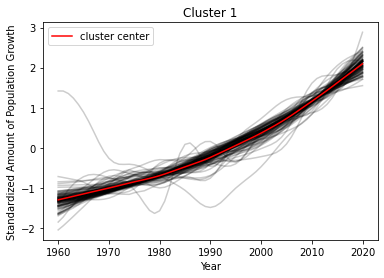

In [ ]:
# plot cluster 1
plt.plot(cc1,'r', zorder = 112)
plt.legend(['cluster center']);
plt.plot(pop_df_std[c[1] == 0].T,'k', alpha = 0.2); 
plt.title("Cluster 1")
plt.xlabel("Year")
plt.xticks(np.arange(0,70,10), years_for_cluster_plotting)
plt.ylabel("Standardized Amount of Population Growth")
(c[1] == 0).sum()

**Fig. 3.** Cluster 1 of countries that show similar patterns of population growth over a 61-year period. At run time, 112 countries are part of cluster 1. It is the second biggest of the 4 requested clusters. The cluster center (which in the case of time series, is also a time series) is the line represented in red. The shape of the cluster center line suggests moderate, linear population growth until the mid-80s. After this point in time, population growth becomes greater, increasing more at each time point. 

#<font color='red'> FBB good</font>

10

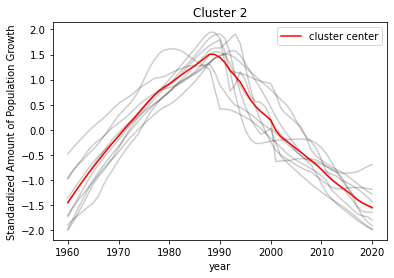

In [ ]:
# plot cluster 2
plt.plot(cc2,'r', zorder = 10)
plt.legend(['cluster center']);
plt.plot(pop_df_std[c[1] == 1].T,'k', alpha = 0.2); 
plt.title("Cluster 2")
plt.xlabel("year")
plt.xticks(np.arange(0,70,10), years_for_cluster_plotting)
plt.ylabel("Standardized Amount of Population Growth")
(c[1] == 1).sum()

**Fig. 4.** Cluster 2 of countries that show similar patterns of population growth over a 61-year period. At runtime, 10 countries are part of cluster 2. This is the smallest of the four requested clusters. The cluster center is represented in red. The shape of the cluster center line suggests increasing population growth until 1990, similar to cluster 3. After 1990, population growth decreases at a slightly steeper magnitude than it increased prior to 1990.

#<font color='red'> FBB good</font>

25

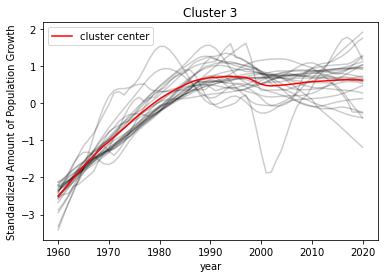

In [ ]:
# plot cluster 3
plt.plot(cc3,'r', zorder = 25)
plt.legend(['cluster center']);
plt.plot(pop_df_std[c[1] == 2].T,'k', alpha = 0.2); 
plt.title("Cluster 3")
plt.xlabel("year")
plt.xticks(np.arange(0,70,10), years_for_cluster_plotting)
plt.ylabel("Standardized Amount of Population Growth")
(c[1] == 2).sum()

**Fig. 5.** Cluster 3 of countries that show similar patterns of population growth over a 61-year period. At runtime, 25 countries are part of cluster 3. This is the second smallest of the four requested clusters. The cluster center is represented in red. The shape of the cluster center line suggests increasing population growth until 1990. Between 1990 and 2020, the population growth has remained at a steady level. 

#<font color='red'> FBB there is clearly one outlier here with a dip in 2000</font>

115

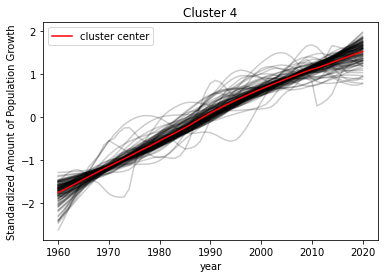

In [ ]:
# plot cluster 4
plt.plot(cc4,'r', zorder = 115)
plt.legend(['cluster center']);
plt.plot(pop_df_std[c[1] == 3].T,'k', alpha = 0.2); 
plt.title("Cluster 4")
plt.xlabel("year")
plt.xticks(np.arange(0,70,10), years_for_cluster_plotting)
plt.ylabel("Standardized Amount of Population Growth")
(c[1] == 3).sum()

**Fig. 6.** Cluster 4 of countries that show similar patterns of population growth over a 61-year period. At run time, 115 countries are part of cluster 4. It is the biggest of the four requested clusters. The cluster center is represented in red. The shape of the cluster center line suggests a (almost) linear growth of population growth throughout the entire time window that is shown. 

In [ ]:
c2_countries = pop_df_clean.loc[c_8_new[1] == 1].index
c8_countries = pop_df_clean.loc[c_8_new[1] == 7].index
print("Cluster 2 is the smallest cluster of the dataset.")
print(f"Its 10 members are {c2_countries[0]},  {c2_countries[1]},  {c2_countries[2]}, {c2_countries[3]}, {c2_countries[4]},\n{c2_countries[5]}, {c2_countries[6]},  {c8_countries[0]},  {c8_countries[1]}, and {c8_countries[2]}.")

Cluster 2 is the smallest cluster of the dataset.
Its 10 members are Bosnia and Herzegovina,  Estonia,  Georgia, Croatia, Lithuania,
Romania, Ukraine,  Bulgaria,  Hungary, and Latvia.


Cluster 2 is the smallest cluster of the dataset.
Its 10 members are Bosnia and Herzegovina,  Estonia,  Georgia, Croatia, Lithuania, Romania, Ukraine,  Bulgaria,  Hungary, and Latvia.

#<font color='red'> FBB good!</font>

Original code to get smallest cluster countries below. I need to re-run the code to get the variable c, but I don't want to risk getting new clusters. Therefore, recreated cluster 2 using "test clusters" that are still in my workspace. Problem of non-determinism described below.

In [ ]:
# Countries belonging to the smallest cluster (cluster 4 (10 members))
#c2_countries = pop_df_clean.loc[c[1] == 1].index
#print("Cluster 2 is the smallest cluster of the dataset.")
#print(f"Its 10 members are {c2_countries[0]},  {c2_countries[1]},  {c2_countries[2]}, {c2_countries[3]}, {c2_countries[4]},\n{c2_countries[5]}, {c2_countries[6]},  {c2_countries[7]},  {c2_countries[8]}, and {c2_countries[9]}.")

In [ ]:
# Countries belonging to the second smalles cluster (cluster 2 (26 members))
c3_countries = pop_df_clean.loc[c[1] == 2].index
print("Cluster 3 is the second smallest cluster of the dataset.")
print(f"Its 25 members are {c3_countries[0]},  {c3_countries[1]},  {c3_countries[2]}, {c3_countries[3]}, {c3_countries[4]},\n{c3_countries[5]}, {c3_countries[6]},  {c3_countries[7]},  {c3_countries[8]}, {c3_countries[9]}, {c3_countries[10]}, {c3_countries[11]}, {c3_countries[12]}, \n{c3_countries[13]},  {c3_countries[14]}, {c3_countries[15]},  {c3_countries[16]},  {c3_countries[17]}, {c3_countries[18]},  {c3_countries[19]}, \n{c3_countries[20]}, {c3_countries[21]},  {c3_countries[22]},  {c3_countries[23]}, and {c3_countries[24]}.")


Cluster 3 is the second smallest cluster of the dataset.
Its 25 members are Albania,  Armenia,  Belarus, Central Europe and the Baltics, Curacao,
Czech Republic, Dominica,  Faroe Islands,  Greenland, Guyana, Japan, Kazakhstan, Moldova, 
North Macedonia,  Montenegro, Poland,  Puerto Rico,  Russian Federation, Serbia,  Slovak Republic, 
Slovenia, Tonga,  St. Vincent and the Grenadines,  Virgin Islands (U.S.), and Kosovo.


Cluster 3 is the second smallest cluster of the dataset.
Its 25 members are Albania,  Armenia,  Belarus, Central Europe and the Baltics, Curacao, Czech Republic, Dominica,  Faroe Islands,  Greenland, Guyana, Japan, Kazakhstan, Moldova, North Macedonia,  Montenegro, Poland,  Puerto Rico,  Russian Federation, Serbia,  Slovak Republic, Slovenia, Tonga,  St. Vincent and the Grenadines,  Virgin Islands (U.S.), and Kosovo.

When re-running the code, the clustering algorithm produces slightly different clusters. This is because k-means clustering is non-deterministic. The initial cluster centers that the algorithm chooses determine what clusters will be found. Since this initial guess is different on each run, the results will look different. This means that a different cluster might be the smalles one or the number of countries in a cluster might differ slightly, which will break the print statements above. 

**Interpretation of Population Growth Clusters:**

Both small clusters comprise many Baltic countries and regions of the former Yugoslavia and Soviet Union. Two important historical events took place in the 1990s that may have caused divergent patterns of population growth. First, the fall of the Soviet Union and the end of the Cold War changed the structure of formerly communist societies fundamentally. For both small clusters, 1990 marks the end of a population growth increase. Additionally, the Baltic countries represented in both small clusters saw the Yugoslav Wars throughout the 90s. The diminishing of the East-West divide allowed people to move west, where people were wealthier. The wars pushed even more people to leave (die in war) resulting in negative population growth. 


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
intracluster_variance = []
K = range(2,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pop_df_std)
    intracluster_variance.append(kmeanModel.inertia_)

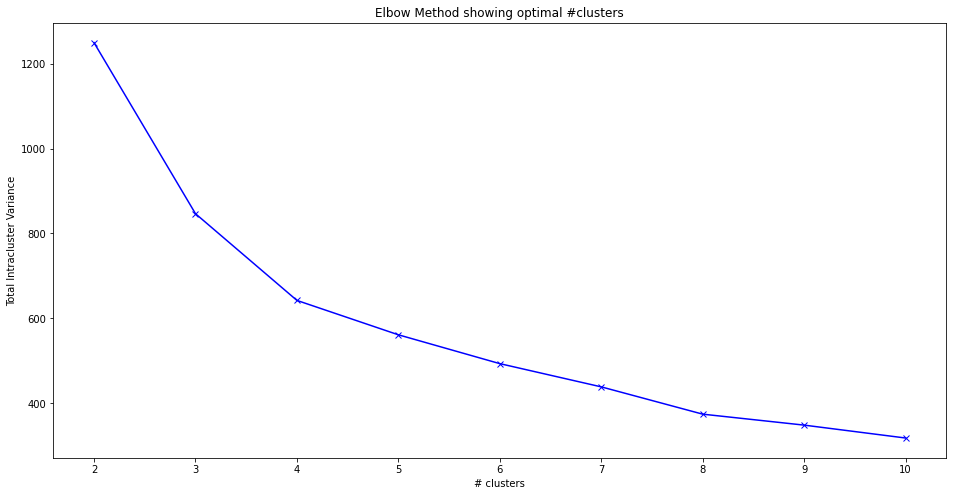

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, intracluster_variance, 'bx-')
plt.xlabel('# clusters')
plt.ylabel('Total Intracluster Variance')
plt.title('Elbow Method showing optimal #clusters')
plt.show()

**Fig. 7a.** Elbow Plot. Intracluster Variance is plotted against number of clusters. Sklearn function.

This allows us to identify the optimal number of clusters to group the data points from the population size data. As the number of clusters increases, the number of datapoints within a cluster decreases. That makes each individual cluster more compact (e.g., less intracluster variance). For that reason, the total intracluster variance decreases with increasing # clusters. To find the optimal #clusters, we find the point at which intracluster variance starts to decrease more slowly. 

According to this plot, choosing 4 clusters was probably a good bet! From this point onwards the decrease becomes flatter. Just for fun, I will repeat the procedure above with 8 clusters. It looks like 8 also marks a turning point after wich the line is flatter. 



Manual implementation of calculating intracluster variance:

In [ ]:
intra_var = []
for n in range(2, 11):
  cluster_var = 0
  cluster_n = cluster.k_means(pop_df_std, n)
  for i in range(0, n):
    cluster_mean = np.mean(pop_df_std[cluster_n[1] == i], axis = 0)
    within_cluster_var = np.sum((pop_df_std[cluster_n[1] == i] - cluster_mean)**2)
    cluster_var += within_cluster_var
  intra_var.append(np.sum(cluster_var))

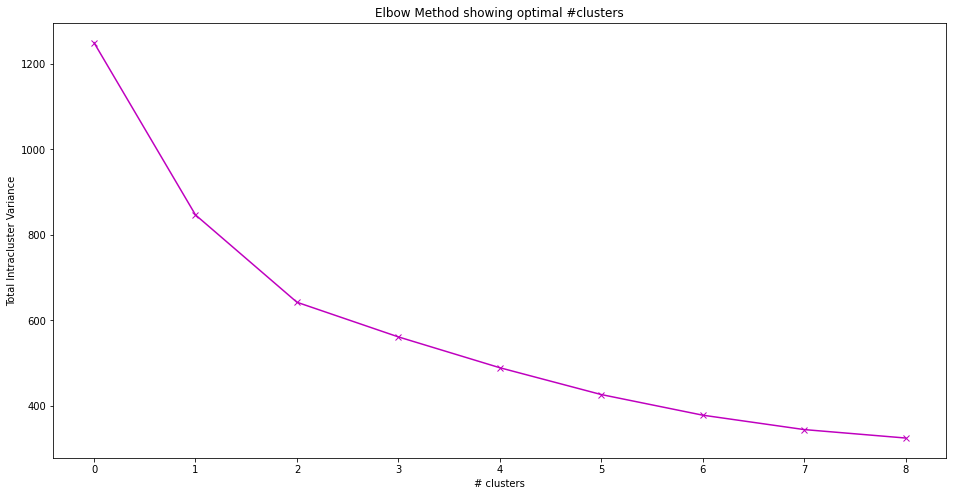

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(intra_var, 'mx-')
plt.xlabel('# clusters')
plt.ylabel('Total Intracluster Variance')
plt.title('Elbow Method showing optimal #clusters')
plt.show()

**Fig. 7b.** Elbow Plot. Intracluster Variance is plotted against number of clusters. Nested for-loop.

Description same as Fig. 7a.

In [ ]:
c_8 = cluster.k_means(pop_df_std, 8)

In [ ]:
# get cluster centers
c_8c1 = c_8[0][0]
c_8c2 = c_8[0][1]
c_8c3 = c_8[0][2]
c_8c4 = c_8[0][3]
c_8c5 = c_8[0][4]
c_8c6 = c_8[0][5]
c_8c7 = c_8[0][6]
c_8c8 = c_8[0][7]

34

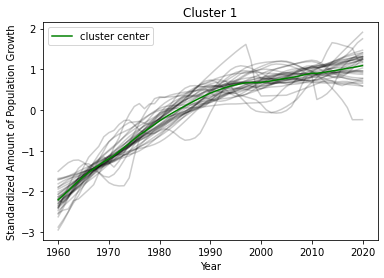

In [ ]:
# plot cluster 1
plt.plot(c_8c1,'g', zorder = 34)
plt.legend(['cluster center']);
plt.plot(pop_df_std[c_8[1] == 0].T,'k', alpha = 0.2); 
plt.title("Cluster 1")
plt.xlabel("Year")
plt.xticks(np.arange(0,70,10), years_for_cluster_plotting)
plt.ylabel("Standardized Amount of Population Growth")
(c_8[1] == 0).sum()

**Fig. 8.** Cluster 1 of countries that show similar patterns of population growth over a 61-year period. At run time, 34 countries are part of cluster 1. The cluster center (which in the case of time series, is also a time series) is the line represented in green. The shape of the cluster center line suggests moderate, linear population growth until the mid-90s. After this point in time, population growth becomes flatter. 

7

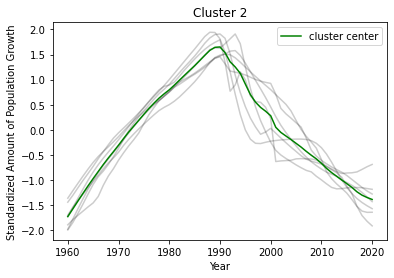

In [ ]:
# plot cluster 2
plt.plot(c_8c2,'g', zorder = 34)
plt.legend(['cluster center']);
plt.plot(pop_df_std[c_8[1] == 1].T,'k', alpha = 0.2); 
plt.title("Cluster 2")
plt.xlabel("Year")
plt.xticks(np.arange(0,70,10), years_for_cluster_plotting)
plt.ylabel("Standardized Amount of Population Growth")
(c_8[1] == 1).sum()

**Fig. 9.** Cluster 2 of countries that show similar patterns of population growth over a 61-year period. At run time, 7 countries are part of cluster 2. The cluster center is the line represented in green. The shape of the cluster center line resembles a flipped 'v'. Population growth increases steadily until 1990. After 1990, ppulation growth decreases at almost the same rate as it increased prior to this point.

1

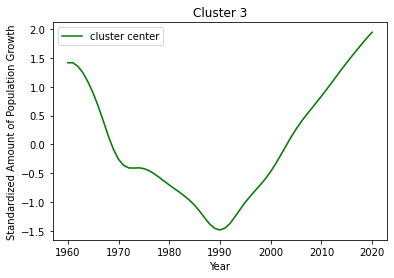

In [ ]:
# plot cluster 3
plt.plot(c_8c3,'g', zorder = 34)
plt.legend(['cluster center']);
plt.plot(pop_df_std[c_8[1] == 2].T,'k', alpha = 0.2); 
plt.title("Cluster 3")
plt.xlabel("Year")
plt.xticks(np.arange(0,70,10), years_for_cluster_plotting)
plt.ylabel("Standardized Amount of Population Growth")
(c_8[1] == 2).sum()

**Fig. 10.** Cluster 3 of countries that show similar patterns of population growth over a 61-year period. At run time, only one countries is part of cluster 3. The cluster center (which in this case is the same as the time series for this country) is the line represented in green. The shape of the cluster center line resembles a "u". Population growth decreases until 1990, and increases from then on. 

#<font color='red'> FBB this is a cluster of 1 - i.e. an outlier</font>

#<font color='red'> FBB interesting outliner - did you look for which country it was? </font>

97

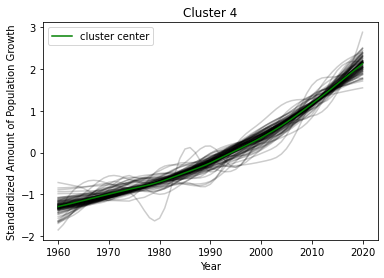

In [ ]:
# plot cluster 4
plt.plot(c_8c4,'g', zorder = 97)
plt.legend(['cluster center']);
plt.plot(pop_df_std[c_8[1] == 3].T,'k', alpha = 0.2); 
plt.title("Cluster 4")
plt.xlabel("Year")
plt.xticks(np.arange(0,70,10), years_for_cluster_plotting)
plt.ylabel("Standardized Amount of Population Growth")
(c_8[1] == 3).sum()

**Fig. 11.** Cluster 4 of countries that show similar patterns of population growth over a 61-year period. At run time, 97 countries are part of cluster 4. The cluster center is the line represented in green. The shape of the cluster center line suggests moderate, linear population growth until the mid-80s. After this point in time, population growth becomes greater, increasing more at each time point. The transition around the mid-80s looks smooth.

110

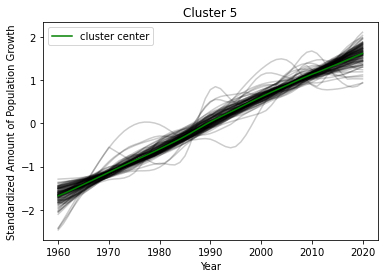

In [ ]:
# plot cluster 5
plt.plot(c_8c5,'g', zorder = 110)
plt.legend(['cluster center']);
plt.plot(pop_df_std[c_8[1] == 4].T,'k', alpha = 0.2); 
plt.title("Cluster 5")
plt.xlabel("Year")
plt.xticks(np.arange(0,70,10), years_for_cluster_plotting)
plt.ylabel("Standardized Amount of Population Growth")
(c_8[1] == 4).sum()

**Fig. 12.** Cluster 5 of countries that show similar patterns of population growth over a 61-year period. At run time, 110 countries are part of cluster 5. The cluster center is the line represented in green. The shape of the cluster center line suggests a linear increase in population growth.

7

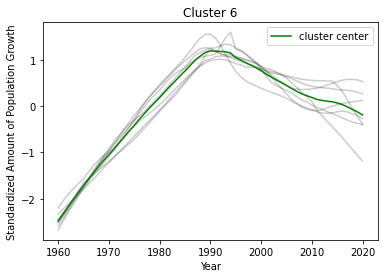

In [ ]:
# plot cluster 6
plt.plot(c_8c6,'g', zorder = 34)
plt.legend(['cluster center']);
plt.plot(pop_df_std[c_8[1] == 5].T,'k', alpha = 0.2); 
plt.title("Cluster 6")
plt.xlabel("Year")
plt.xticks(np.arange(0,70,10), years_for_cluster_plotting)
plt.ylabel("Standardized Amount of Population Growth")
(c_8[1] == 5).sum()

**Fig. 13.** Cluster 6 of countries that show similar patterns of population growth over a 61-year period. At run time, 7 countries are part of cluster 6. The cluster center is the line represented in green. The shape of the cluster center line suggests a strong increase in population growth until 1990 and a slow decrease after 1990.

3

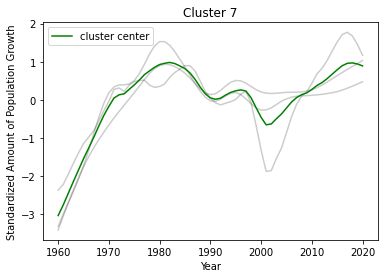

In [ ]:
# plot cluster 7
plt.plot(c_8c7,'g', zorder = 34)
plt.legend(['cluster center']);
plt.plot(pop_df_std[c_8[1] == 6].T,'k', alpha = 0.2); 
plt.title("Cluster 7")
plt.xlabel("Year")
plt.xticks(np.arange(0,70,10), years_for_cluster_plotting)
plt.ylabel("Standardized Amount of Population Growth")
(c_8[1] == 6).sum()

**Fig. 14.** Cluster 7 of countries that show similar patterns of population growth over a 61-year period. At run time, 3 countries are part of cluster 7. The cluster center is the line represented in green. The shape of the cluster center line suggests an increase in population growith until the 1980s. Then the center line looks funny. Its goes down and the back up. The trough around 2000 is mostly driven by one of the cluster members.  

3

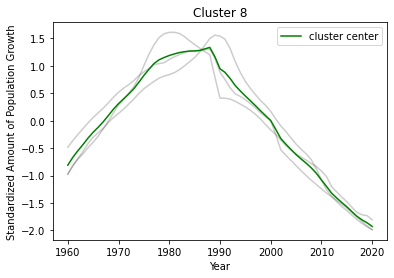

In [ ]:
# plot cluster 8
plt.plot(c_8c8,'g', zorder = 34)
plt.legend(['cluster center']);
plt.plot(pop_df_std[c_8[1] == 7].T,'k', alpha = 0.2); 
plt.title("Cluster 8")
plt.xlabel("Year")
plt.xticks(np.arange(0,70,10), years_for_cluster_plotting)
plt.ylabel("Standardized Amount of Population Growth")
(c_8[1] == 7).sum()

**Fig. 15.** Cluster 8 of countries that show similar patterns of population growth over a 61-year period. At run time, 3 countries are part of cluster 8. The cluster center is the line represented in green. The shape of the cluster center line resembles an upside down 'v' with a peak around 1990. 

**Descriptive Comparison of the clusters when partioned into 4 vs. 8 clusters**

The two big clusters are maintained. Cluster 4 (#clusters = 8) corresponds to cluster 1 (#clusters = 4) and cluster 5 (#clusters = 8) to cluster 4 (#clusters = 4). 

Cluster 3 (#clusters = 8) consists of a single time series. This is an outlier. Below, I show that this outlier corresponds to St. Kitts and Nevis. 

#<font color='red'> FBB good</font>

Cluster 2 (#clusters = 4) was divided into clusters 2 and 8 (#clusters = 8). This highlights that the population growth prior to the peak in 1990 was high earlier in countries of cluster 8 than those in cluster 2. 

What seems to correspond to cluster 3 (#clusters = 4) is cluster 1 (#clusters = 8). Interestingly, the number of members has increased, rather than decreased. This could mean that additional clusters now capture some of the time series that were just lumped together with the two big clusters before. The shape of the big clusters has become more defined as a result, now being a worse fit for some of the time series that are now assigned to cluster 1 (#clusters = 8). 

Cluster 6 and 7 (#clusters = 8) seem to represent sub-groups of cluster 3 (#clusters = 4). The center of cluster 3 (#clusters = 4) has a small dip in the early 2000s. The countries that drive this dip are captured now in cluster 7 (#clusters = 8). Cluster 6 (#clusters = 8) has a slight decrease after 1990, which makes it different from cluster 1 (#clusters = 8)/cluster 3 (#clusters = 4). 


Within cluster 7 (#clusters = 8), there seems to be an outlier. Below, I'm plotting this outlier on its own and identify the corresponding country. 

Identify country represented by cluster 3.

In [ ]:
cluster3_country = pop_df_clean.loc[c_8[1] == 4].index[0]

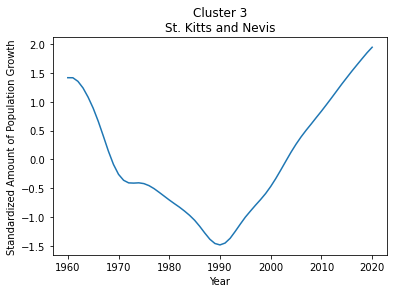

In [ ]:
plt.plot(pop_df_std[c_8[1] == 4].T[:, 0]);
plt.title(f"Cluster 3\n{cluster3_country}")
plt.xlabel("Year")
plt.xticks(np.arange(0,70,10), years_for_cluster_plotting)
plt.ylabel("Standardized Amount of Population Growth");

Identify outlier country in cluster 7. Each of the three countries was plotted separately and compared against the shape of the outlier. 

In [ ]:
outlier_country = pop_df_clean.loc[c_8[1] == 6].index[0]

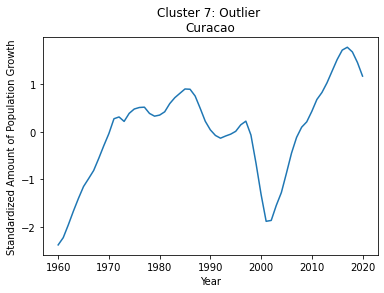

In [ ]:
plt.plot(pop_df_std[c_8[1] == 6].T[:, 0]);
plt.title(f"Cluster 7: Outlier \n{outlier_country}")
plt.xlabel("Year")
plt.xticks(np.arange(0,70,10), years_for_cluster_plotting)
plt.ylabel("Standardized Amount of Population Growth");

**Contextualizing the Outliers**

St. Kitts and Nevis: The line representing population growth between the years 1960 - 2020 resembles a u-shaped curve with a trough at the year 1990. According to a quick google search, the economy of this country was hurt by a drop in world sugar prices through the mid 80s leading to larger numbers of emigration. Economic instability may be driving the strong downward trend around 1990.


Curacao: The population growth develops similarly to that of other members of cluster 7. However, there is a drastic drop in population growth around the year 2000. Similar to St. Kitts and Nevis (also similar in geographic location), Curacao saw economic challenges in the 1980s-1990s. A lot of people emigrated to the Netherlands. In 2007, Curacao became a country of the Kingdom of the Netherlands, which stabilized the situation.



#<font color='red'> FBB very nice!</font>

**Contextualizing the new results. Does is make sense to look for 8, rather than just 4 clusters in the population size data?**

Due to limited doamin knowledge, I find it har to decide whether choosing 8 clusters instead of 4 helped painting a clearer picture of global population growth dynamics. 

It seems that most of world's countries fall into two clusters of population growth: a linear increase or a slightly curved increase. The remaining clusters show turning points in population growth around the year 1990. This year marks the end of the Cold War and affected societies of the former east bloc deeply. Population growth seems to generally stagnate or fall after this point, perhaps pointing to migration. The few countries that are not captured by this group and that show different (even oppposite) population growth trends are small Caribbean island states that faced economic challenges. 

While 8 clusters helped identify outliers (the small Caribbean island states), the 4 cluster method seems to capture the major trends. 1: linear increase, 2: slightly curved increase, 3: stagnation after 1990 and 4: decrease after 1990.



#<font color='red'> FBB very well done</font>